In [161]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, RandomRotation, RandomFlip, RandomContrast, Rescaling, Input, Activation
import matplotlib.pyplot as plt
import logging
tf.get_logger().setLevel(logging.ERROR)
keras.utils.set_random_seed(17)

In [162]:
# Путь к данным
train_dir = 'data/newdata/train_rndm'
test_dir = 'data/newdata/test_rndm'
val_dir = 'data/newdata/val_rndm'
lm = 'binary'

In [163]:
img_h = 128
img_w = 128
size = (img_h, img_h)

In [164]:
train = keras.utils.image_dataset_from_directory(
    directory=train_dir,
    labels='inferred',
    label_mode=lm,
    image_size=size)

validate = keras.utils.image_dataset_from_directory(
    directory=val_dir,
    labels='inferred',
    label_mode=lm,
    image_size=size)

test = keras.utils.image_dataset_from_directory(
    directory=test_dir,
    labels='inferred',
    label_mode=lm,
    image_size=size)

Found 360 files belonging to 2 classes.
Found 120 files belonging to 2 classes.
Found 120 files belonging to 2 classes.


In [165]:
EPOCHS = 500
BATCH_SIZE = 64

data_augmentation = keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal_and_vertical"),
        tf.keras.layers.RandomRotation(factor=0.1),
        tf.keras.layers.RandomContrast(factor=0.1),
        tf.keras.layers.RandomZoom(height_factor=0.2, width_factor=0.2),
        tf.keras.layers.RandomBrightness(factor=0.4)
    ]
)
regularizer = keras.regularizers.L2(l2=0.01)

In [166]:
model = Sequential()
model.add(Input(shape=(img_h,img_w,3)))
model.add(data_augmentation)
model.add(Rescaling(scale=1./255))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=f'{lm}_crossentropy',
              optimizer='adam', metrics =['accuracy'])
#model.build(input_shape=(64,64,3))
model.summary()


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_22 (Sequential)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_11 (Rescaling)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 32, 32, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,106,017 (4.22 MB)

 Trainable params: 1,106,017 (4.22 MB)

 Non-trainable params: 0 (0.00 B)

In [167]:
history = model.fit(train, validation_data=validate,
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    #verbose=2,
                    shuffle=True)

Epoch 1/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 390ms/step - accuracy: 0.4531 - loss: 0.8039 - val_accuracy: 0.5000 - val_loss: 0.6941
Epoch 2/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 423ms/step - accuracy: 0.5006 - loss: 0.6961 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 371ms/step - accuracy: 0.4629 - loss: 0.6942 - val_accuracy: 0.4833 - val_loss: 0.6932
Epoch 4/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 368ms/step - accuracy: 0.4395 - loss: 0.6943 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 5/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 369ms/step - accuracy: 0.4772 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6929
Epoch 6/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 388ms/step - accuracy: 0.4848 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 7/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 407ms/step - accuracy: 0.5909 - loss: 0.6911 - val_accuracy: 0.5000 - val_loss: 0.6919
Epoch 8/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 397ms/step - accuracy: 0.4696 - loss: 0.6930 - val_accu

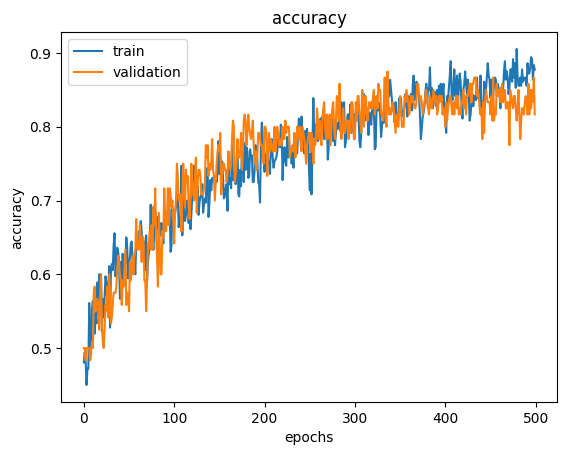

In [168]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])
plt.show()

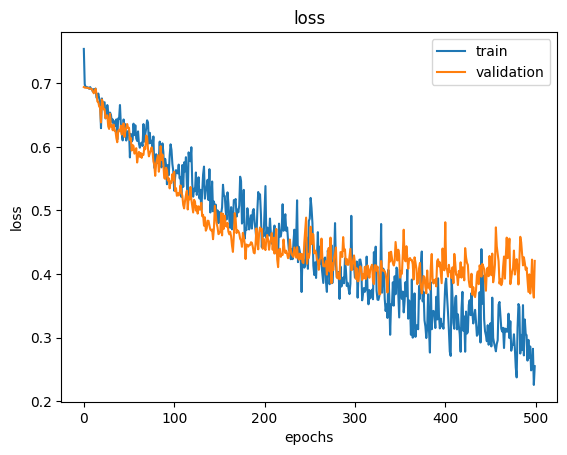

In [169]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])

In [170]:
model.evaluate(validate)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.8433 - loss: 0.4034


[0.44631829857826233, 0.8166666626930237]

In [171]:
model.evaluate(test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.7835 - loss: 0.6511


[0.6551269888877869, 0.800000011920929]

In [180]:
img = list(test)[0]
x_out = model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


80.0 %


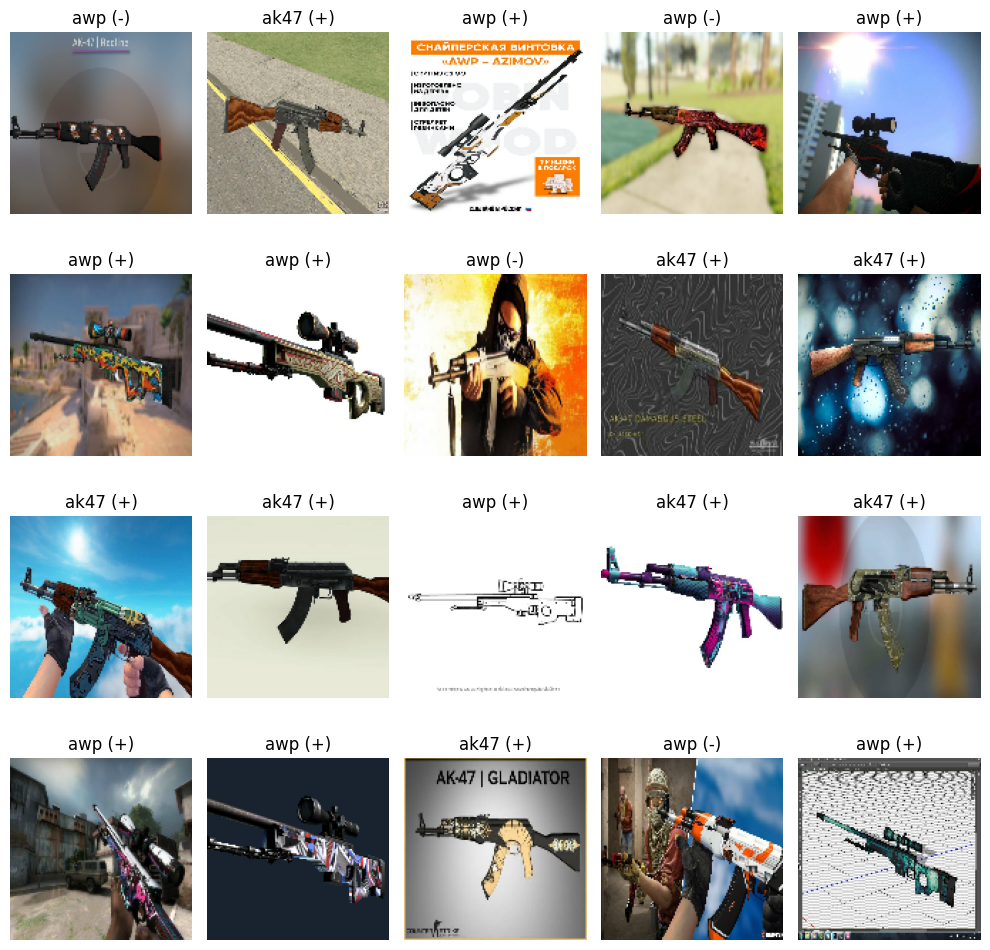

In [181]:
c = 0
fig, axes = plt.subplots(4, 5, figsize=(10, 10))
for i in range(20):
    if x_out[i] >= 0.5 and img[1][i] == 1 or x_out[i] < 0.5 and img[1][i] == 0:
        sign = '+'
        c += 1
    else: sign = '-'
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    ax.imshow(img[0][i].numpy().astype("uint8"))
    ax.axis("off")
    ax.set_title(f"{'ak47' if x_out[i] <= 0.5 else 'awp'} ({sign})", fontsize=12)
plt.tight_layout()
print(c/20*100, '%')

In [189]:
# # Генерируем описание модели в формате json
# model_json = model.to_json()
# # Записываем модель в файл
# json_file = open("csbin_model_v1.json", "w")
# json_file.write(model_json)
# json_file.close()

In [191]:
# model.save_weights("csbin_model_v1.weights.h5")

In [193]:
# model.save('csbin_model_v1.keras')